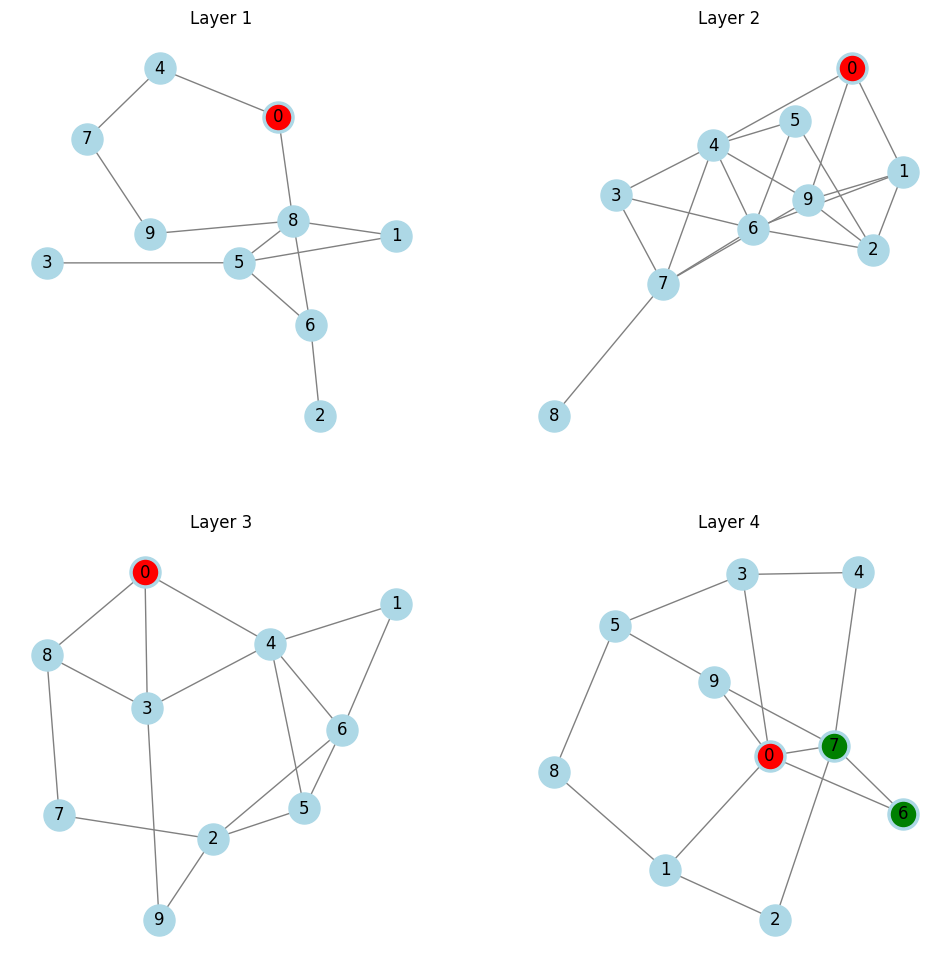

[set(), set(), set(), {6, 7}]

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create four different layers of the multiplex network
layers = []
for i in range(4):
    G = nx.erdos_renyi_graph(10, 0.4, seed=i)  # Random graph with 10 nodes and probability 0.4
    layers.append(G)

# Define a node for which we will find exclusive neighbors
node_of_interest = 0

# Plot the multiplex network and highlight exclusive neighbors
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
layer_titles = ["Layer 1", "Layer 2", "Layer 3", "Layer 4"]
exclusive_neighbors = []

for i, (G, ax) in enumerate(zip(layers, axes.flatten())):
    # Find exclusive neighbors for the node of interest
    all_neighbors = set()
    for j, other_G in enumerate(layers):
        if j != i:
            all_neighbors.update(other_G.neighbors(node_of_interest))
    exclusive_neighbors_layer = set(G.neighbors(node_of_interest)) - all_neighbors
    exclusive_neighbors.append(exclusive_neighbors_layer)
    
    # Plot the graph
    pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
    nx.draw(G, pos, ax=ax, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=[node_of_interest], node_color="red", ax=ax)
    nx.draw_networkx_nodes(G, pos, nodelist=list(exclusive_neighbors_layer), node_color="green", ax=ax)
    ax.set_title(layer_titles[i])

plt.show()

exclusive_neighbors  # Return the exclusive neighbors for each layer as a list